In [12]:
import numpy as np
import pandas as pd
data=pd.read_csv('NIFTY_6month.csv')
data.head()


,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,10-JUN-2024,23319.15,23411.90,23227.15,23259.20,304392368.0,29060.40
1,11-JUN-2024,23283.75,23389.45,23206.65,23264.85,305185666.0,29190.91
2,12-JUN-2024,23344.45,23441.95,23295.95,23322.95,295630910.0,31795.48
3,13-JUN-2024,23480.95,23481.05,23353.90,23398.90,268279841.0,30151.67
4,14-JUN-2024,23464.95,23490.40,23334.25,23465.60,223086741.0,25746.34


In [13]:
data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
120,03-DEC-2024,24367.50,24481.35,24280.00,24457.15,339470947.0,34228.30
121,04-DEC-2024,24488.75,24573.20,24366.30,24467.45,348003156.0,34639.78
122,05-DEC-2024,24539.15,24857.75,24295.55,24708.40,361469920.0,40471.33
123,06-DEC-2024,24729.45,24751.05,24620.50,24677.80,226731303.0,23904.13
124,09-DEC-2024,24633.90,24705.00,24580.05,24619.00,248139308.0,25099.79


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             125 non-null    object 
 1   Open             125 non-null    float64
 2   High             125 non-null    float64
 3   Low              125 non-null    float64
 4   Close            125 non-null    float64
 5   Shares Traded    124 non-null    float64
 6   Turnover (₹ Cr)  124 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.0+ KB


In [15]:
data['Date'] = pd.to_datetime(data['Date '])
data.set_index('Date ', inplace=True)

# Check for missing values and handle them if any
data = data.dropna(inplace=True)

data.info()

C:\Users\Prerana Walvekar\AppData\Local\Temp\ipykernel_19640\1018640965.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date '] = pd.to_datetime(data['Date '])


AttributeError: 'NoneType' object has no attribute 'info'

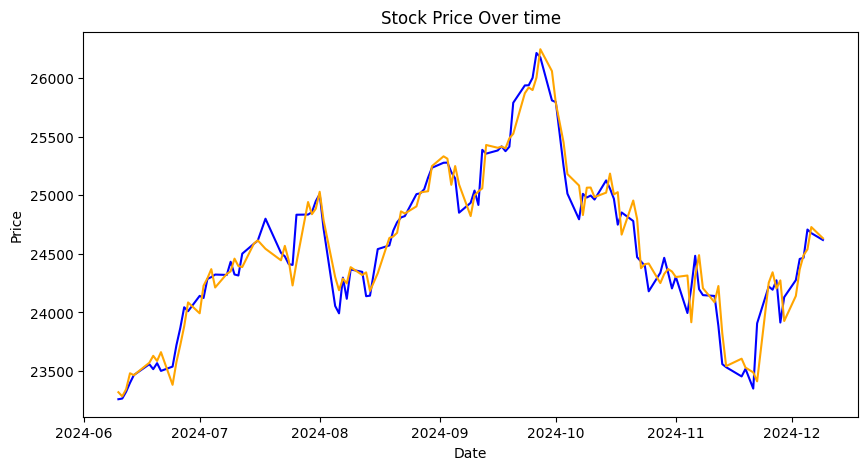

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Close '],label='Close Price',color='blue')
plt.plot(data['Open '],label='Close Price',color='orange')
plt.title('Stock Price Over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

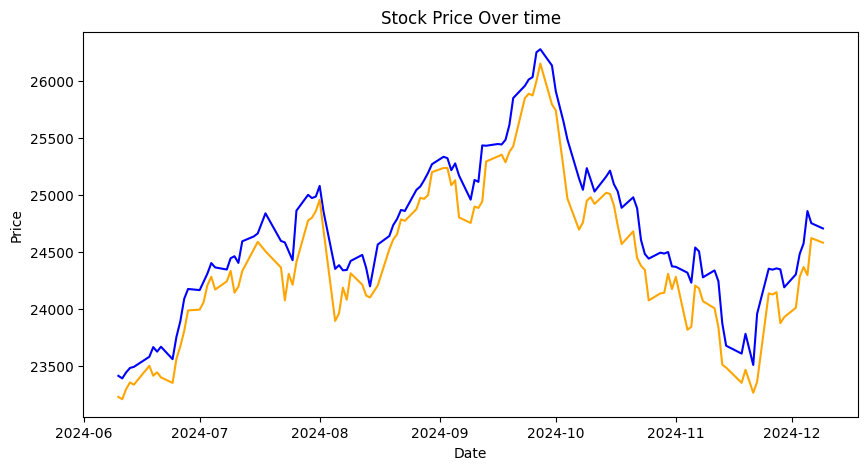

In [58]:
plt.figure(figsize=(10,5))
plt.plot(data['High '],label='Close Price',color='blue')
plt.plot(data['Low '],label='Close Price',color='orange')
plt.title('Stock Price Over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Check stationary

In [26]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['Close '])
print("ADF Statics : ",result[0])
print("p-value : ",result[1])
if(result[1]<=0.05):
    print("The data is stationary.")
else:
     print("The data is not stationary. Differencing might be required.")

ADF Statics :  -2.2172851759858263
p-value :  0.2000318533553696
The data is not stationary. Differencing might be required.


In [27]:
#differencing
data['Close_diff']=data['Close '].diff().dropna()
#Check data is stationary
result=adfuller(data['Close_diff'].dropna())
print("ADF Statics : ",result[0])
print("p-value : ",result[1])
if(result[1]<=0.05):
    print("The data is stationary.")
else:
     print("The data is not stationary. Differencing might be required.")


ADF Statics :  -10.228551640359122
p-value :  5.100160029457689e-18
The data is stationary.


#Autocorrelation and Partial Autocorrelation

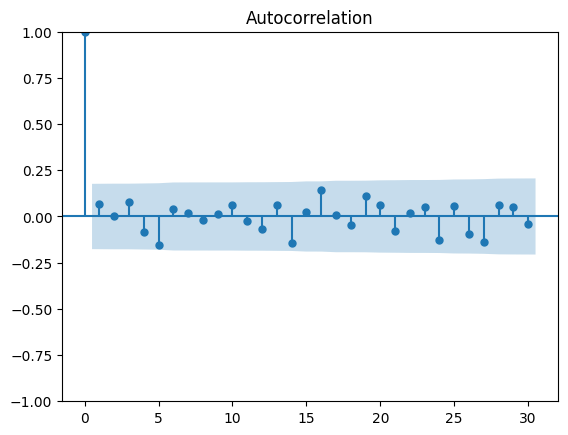

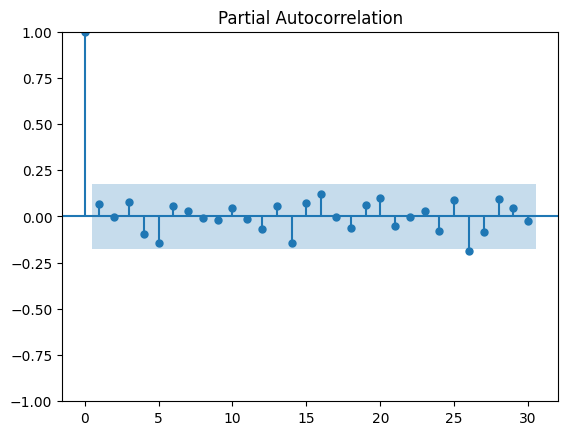

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data["Close_diff"].dropna(),lags=30)
plot_pacf(data["Close_diff"].dropna(),lags=30)
plt.show()

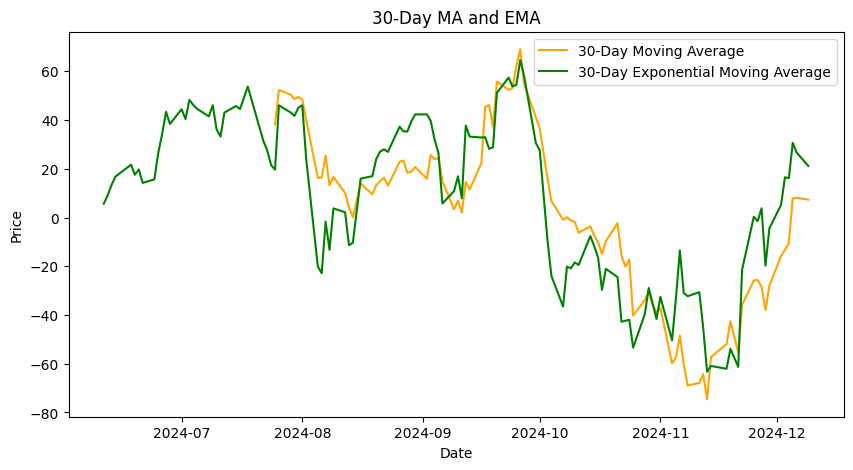

In [38]:
# Calculate 30-day Moving Average and Exponential Moving Average
data['30_day_MA'] = data['Close_diff'].rolling(window=30).mean()
data['30_day_EMA'] = data['Close_diff'].ewm(span=30, adjust=False).mean()

# Plotting the Moving Averages
plt.figure(figsize=(10, 5))
plt.plot(data['30_day_MA'], label='30-Day Moving Average', color='orange')
plt.plot(data['30_day_EMA'], label='30-Day Exponential Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('30-Day MA and EMA')
plt.legend()
plt.show()



In [56]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['Close '],order=(2,1,0))
arima_result=model.fit()
arima_result.summary()

c:\Users\Shahuraje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Close    No. Observations:                  124
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -817.155
Date:                Thu, 12 Dec 2024   AIC                           1640.310
Time:                        19:24:57   BIC                           1648.747
Sample:                             0   HQIC                          1643.737
                                - 124                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0618      0.093      0.665      0.506      -0.120       0.244
ar.L2          0.0114      0.087      0.132      0.895      -0.159       0.182
sigma2      3.504e+04   3471.500     10.094      0.000    2.82e+04    4.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.02
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.28
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\Shahuraje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Shahuraje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


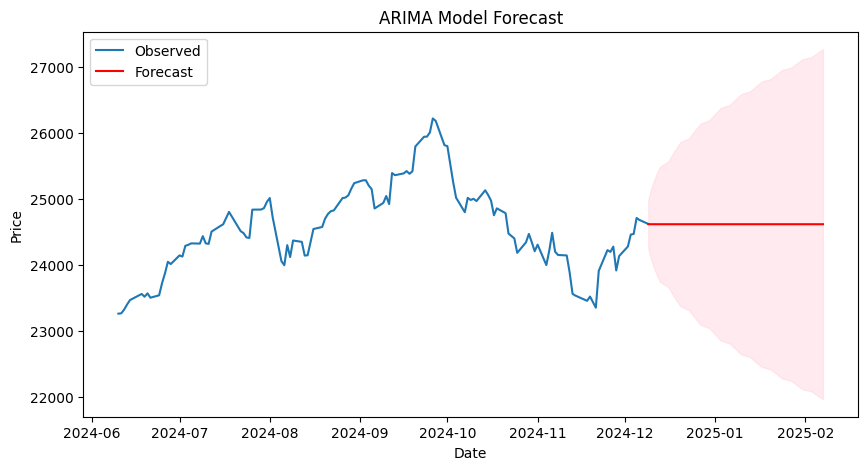

In [ ]:
forecast=arima_result.get_forecast(steps=45)
forecast_index=pd.date_range(start=data.index[-1],periods=45,freq='B')
# Extract forecasted values
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
plt.figure(figsize=(10, 5))
plt.plot(data['Close '], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [61]:
import numpy as np

# Calculate RMSE manually
train_predictions = arima_result.fittedvalues
rmse = np.sqrt(((train_predictions - data['Close ']) ** 2).mean())
print("RMSE:", rmse)



RMSE: 2096.9165515038185


In [65]:
# Save the forecast to a CSV file
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast_mean,
    'Lower_CI': forecast_ci.iloc[:, 0],
    'Upper_CI': forecast_ci.iloc[:, 1]
})
forecast_df.to_csv('forecasted_data.csv', index=False)
df=pd.read_csv('forecasted_data.csv')
df



,Date,Forecast,Lower_CI,Upper_CI
0,2024-12-09,24615.017139,24248.126067,24981.908211
1,2024-12-10,24614.098153,24078.968085,25149.228220
2,2024-12-11,24613.995797,23948.779248,25279.212345
3,2024-12-12,24613.978956,23839.937174,25388.020738
4,2024-12-13,24613.976744,23744.581187,25483.372301
5,2024-12-16,24613.976415,23658.692667,25569.260162
6,2024-12-17,24613.976369,23579.913022,25648.039716
7,2024-12-18,24613.976362,23506.724272,25721.228452
8,2024-12-19,24613.976361,23438.082061,25789.870662
9,2024-12-20,24613.976361,23373.231574,25854.721148
